In [30]:
# !pip3 install -q -r requirements.txt
# !pip install swig
# !pip install gymnasium[box2d]
# !pipreqsnb --force

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

import gymnasium as gym
import numpy as np
import random
import time

from IPython import display

In [12]:
ENV = gym.make("LunarLander-v2", continuous = False, gravity = -10.0, enable_wind = False, wind_power = 15.0, turbulence_power = 1.5, render_mode='rgb_array')
SS = ENV.observation_space # continuous 8-dimensional
N_ACTIONS = ENV.action_space.n # finite action space, 4 actions
ACTIONS_STR = ('X','L','B','R')

The state is an 8-dimensional vector: 
- the coordinates of the lander in x & y,
- its linear velocities in x & y,
- its angle, its angular velocity,
- two booleans that represent whether each leg is in contact with the ground or not.

In [33]:
SS.low, SS.high

(array([-1.5      , -1.5      , -5.       , -5.       , -3.1415927,
        -5.       , -0.       , -0.       ], dtype=float32),
 array([1.5      , 1.5      , 5.       , 5.       , 3.1415927, 5.       ,
        1.       , 1.       ], dtype=float32))

In [34]:
# stochastic init state
ENV.reset()

(array([ 0.0018858 ,  1.412929  ,  0.19099301,  0.08928456, -0.00217835,
        -0.04326276,  0.        ,  0.        ], dtype=float32),
 {})

In [16]:
def rr(env=ENV):
    """quick render fix assuming env's render_mode='rgb_array' """
    # plt.figure(figsize=(5,10))
    plt.axis('off')
    plt.imshow(env.render())
               
def act(action_id: int, env=ENV):
    """filters unnecessary output"""
    return env.step(action_id)[:3]

In [36]:
new_state = act(2) # [state, reward, done, info, ...]
new_state

(array([ 0.00379543,  1.4154259 ,  0.19302747,  0.11096566, -0.00420782,
        -0.04059254,  0.        ,  0.        ], dtype=float32),
 -1.9348177663980721,
 False)

In [30]:
class RandAgent():
    """baseline agent that performs random actions"""
    def __init__(self, n_actions=N_ACTIONS, id_to_str=ACTIONS_STR):
        self.n_actions = n_actions
        self.id_to_str = id_to_str
        
    def act(self, state):
        action = random.randrange(self.n_actions)
        # print('RANDOM!!')
        return action

    def walk(self, max_length, render=False, **actkwargs):
        """take max_length actions by agent N"""
        states, actions, rewards = [], [], []
        # initialization state
        state = ENV.reset()[0]
        for i in range(max_length):
            # perform an action
            action = self.act(state, **actkwargs)
            new_state, reward, done = act(action)
            # log 
            actions.append(action)
            states.append(state) # append OLD state, everything breaks if you start from new
            rewards.append(reward)
            state = new_state
            # continuos visualization w/ proper interrupt
            if render:
                try:
                    rr()
                    display.display(plt.gcf())
                    display.clear_output(wait=True)
                    time.sleep(0.000001)
                except KeyboardInterrupt:
                    break
            if done:
                break
        trajectory = {'s': states,
                        'a': actions,
                            'r': rewards,}
        return trajectory

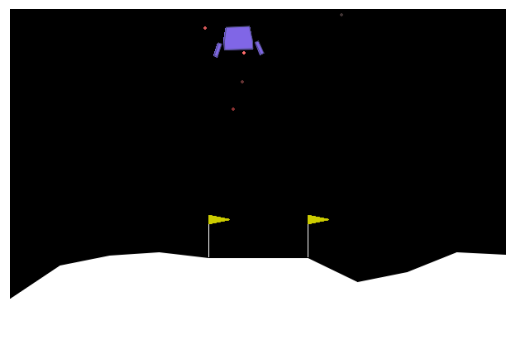

In [31]:
agent = RandAgent()
results = agent.walk(max_length=20, render=True)

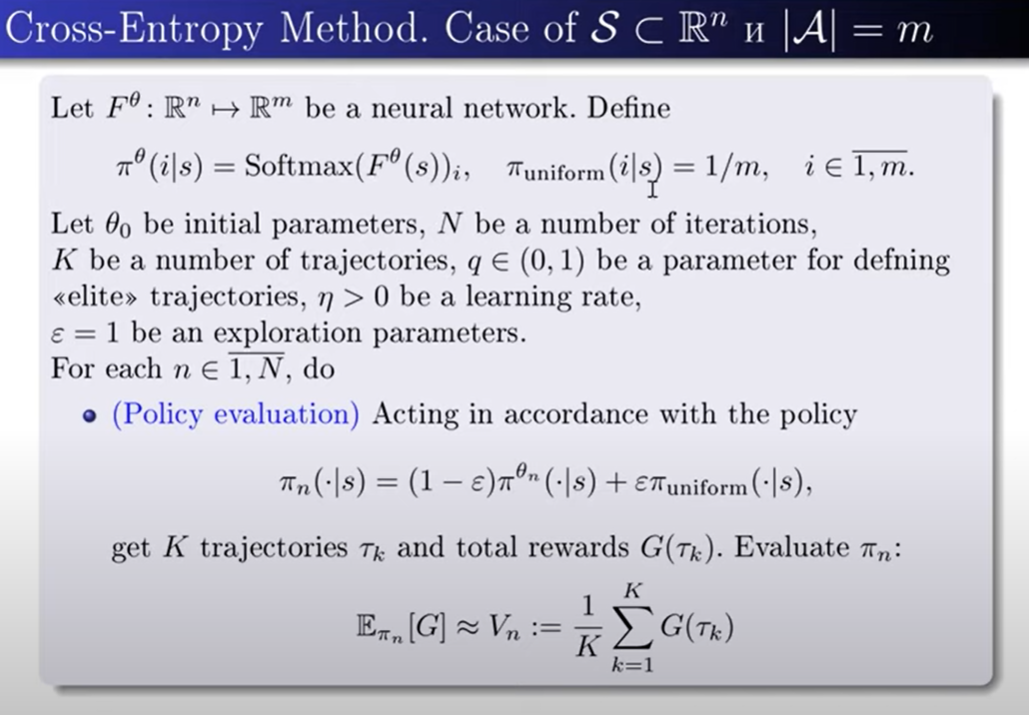
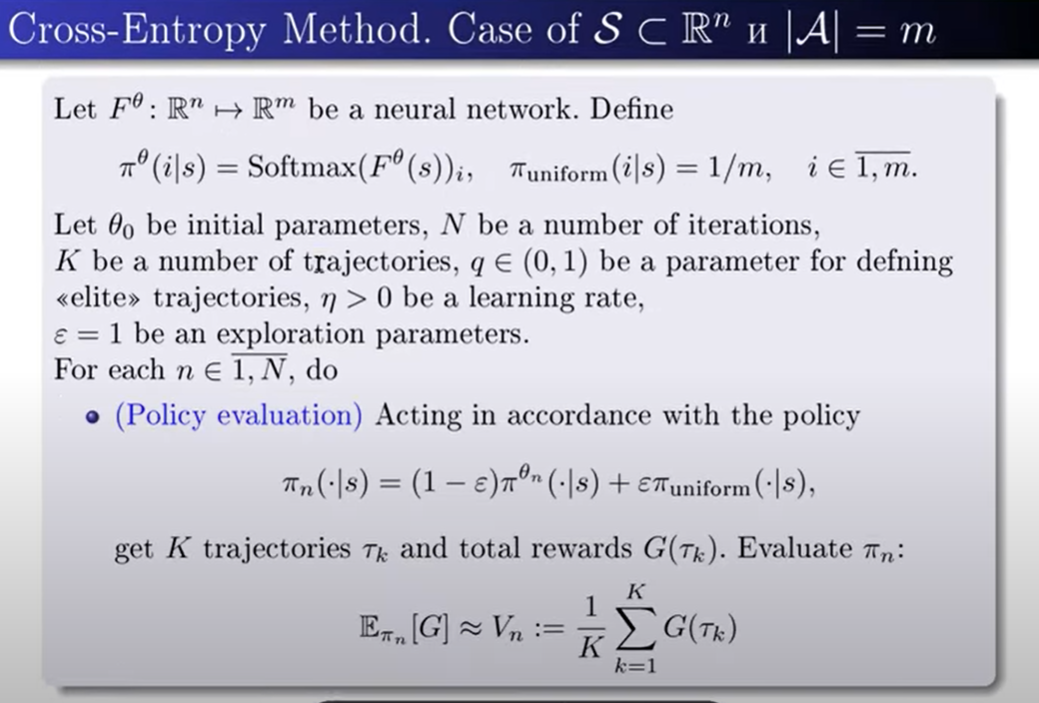